# Predicting Game Wins Using Logistic Regression

The last section of this project is to predict the results of all of the games in the LCK. 

I'm using binary data for output, so [logistic regression](https://realpython.com/logistic-regression-python/) is an easy method to classify wins or losses. 

To recap the previous sections, the most important factors that I could identify from a game of League of Legends is [Gold Difference](https://github.com/inm2/Damwon-Analysis/blob/main/2%20-%20Factors%20of%20Dominance.ipynb) and [Dragons and Barons](https://github.com/inm2/Damwon-Analysis/blob/main/3%20-%20Importance%20of%20Dragons.ipynb). Thus, the independent variables I used for the model are:
- Gold Difference @ 15 minutes: I omitted Gold Difference at 10 minutes, since the shift into the late-stage starts around the 15 minute mark.   
- Dragons  
- Barons  

The dependent variable is the result of the match, which is a binary classification of 0 for a loss and 1 for a win. 

The steps I took to create the model are:  
- Step 1: Upload the dataset and filter to get the data I want    
- Step 2: Declare independent and dependent variables  
- Step 3: Split the data into train and test data  
- Step 4: Create the logistic regression model  
- Step 5: Evaluate the model  

In [4]:
#import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.options.mode.chained_assignment = None  # default='warn'

# Step 1: Upload and Filtering the Dataset 

For this project, I wanted to used regular season and playoff games from the LCK to get as much data as I can for the model. The column 'datacompleteness' indicates that the entire row entry is complete. On my first run of the model, I noticed that some of the entries were incomplete, so I filtered out that specific data. Overall, entries from 469 games are represented in the dataset. 

In [5]:
#reading data
df = pd.read_csv(r'D:\Youtube\Data Analysis\2020LeagueInfo.csv')

#Filter to only read data from Spring and Summer LCK teams + tournaments
is_LCK = df.league == "LCK"
is_team = df.position == "team"
is_complete = df.datacompleteness == "complete"
LCKteam_filter = is_LCK & is_team & is_complete
league = df[LCKteam_filter]

league.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
2410,ESPORTSTMNT01/1302595,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2020,Spring,0,2/5/2020 6:34,1,10.02,...,22.0,24661.0,31445.0,576.0,23452.0,29209.0,557.0,1209.0,2236.0,19.0
2411,ESPORTSTMNT01/1302595,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2020,Spring,0,2/5/2020 6:34,1,10.02,...,-22.0,23452.0,29209.0,557.0,24661.0,31445.0,576.0,-1209.0,-2236.0,-19.0
2422,ESPORTSTMNT01/1302628,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2020,Spring,0,2/5/2020 9:00,2,10.02,...,17.0,24740.0,30318.0,570.0,24285.0,30853.0,559.0,455.0,-535.0,11.0
2423,ESPORTSTMNT01/1302628,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2020,Spring,0,2/5/2020 9:00,2,10.02,...,-17.0,24285.0,30853.0,559.0,24740.0,30318.0,570.0,-455.0,535.0,-11.0
2434,ESPORTSTMNT01/1302635,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2020,Spring,0,2/5/2020 10:14,3,10.02,...,1.0,26333.0,29801.0,522.0,23574.0,28520.0,507.0,2759.0,1281.0,15.0


# Step 2: Declare Independent and Dependent Variables

As mentioned in the introduction, I have three independent variables (x), Gold Difference at 15, the amount of barons a team has at the end of the game, and the amount of dragons a team has at the game.

The dependent variable is the outcome of the match, result, which has values of either 0 or 1. 

In [6]:
feature_cols = ['golddiffat15', 'barons', 'dragons']
x = league[feature_cols]
y = league.result

# Step 3: Split the Data into Train and Test Data 

In this step, I split the data into training and testing data. The purpose of having a split like this is to initially train the model to predict the outcome then independently verify the results using the test data.

Initially, I split the data into 80% train / 20% test.

In [7]:
#Split set data into 80/20
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20,random_state=0)

# Step 4: Create the Logistic Regression Model

Finally, we are ready to create the logistic regression model. The coding for this is pretty simple; the training data is used to fit the data to the model. The prediction of the outcome, ypred, will give an outcome of 0 or 1.

In [8]:
#Create model and train it
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

ypred = logreg.predict(xtest)

C:\Users\Ian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Step 5: Evaluate the Model 

To make sure the model is functioning properly, a confusion matrix is needed. The confusion matrix represents a table of the predicted values (outcome) from the model and what the actual outcome of the model is. 

Accuracy (87%) shows how close the model is to the true data.

Precision (89%) shows how often the model is correct.

Recall (84%) shows how well the model can identify a true positive. 

In [9]:
#Evaluate the model
matrix = metrics.confusion_matrix(ytest, ypred)
print(matrix)
print("Accuracy:",metrics.accuracy_score(ytest, ypred))
print("Precision:",metrics.precision_score(ytest, ypred))
print("Recall:",metrics.recall_score(ytest, ypred))

[[89  9]
 [14 76]]
Accuracy: 0.8776595744680851
Precision: 0.8941176470588236
Recall: 0.8444444444444444


# Extra Steps

The confusion matrix, as it is presented above can be confusing (!) to interpret without labels. In this last step, I will show a graphical representation of the data and show the predicted outcomes vs what is actually derived. 

I used [this resource](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python) to be able to setup the confusion matrix using Matplotlib and Seaborn. 

Text(0.5,257.44,'Predicted Result')

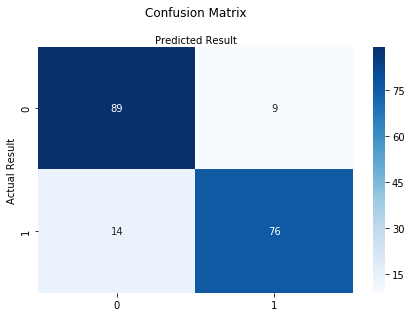

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')

# Conclusion

Overall, using a logistic regression model, I was able to predict the outcomes of the LCK dataset with 87.76% accuracy. Before I reached this outcome, I tested each independent variable seperately in the model. Coincidentally to my previous findings in the last two sections, the accuracy of the models were 75-77%. 

This project, start to finish, took me about a week to do. With the rise in esports data science and analyst demand, projects like this will show the importance of tracking player data and understanding the key defining metrics of an esport title.